In [ ]:
# 1) SETUP -----------------------------------------------------------------
import sys, os

# Add the parent directory (project root) to Python’s module search path
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd

In [ ]:
df = pd.read_csv("../data/raw/data.csv")

print("Shape :", df.shape)

print("An overview of the dataset: the first few rows")

print(df.head()) # display the first few rows


Shape : (95662, 16)
An overview of the dataset: the first few rows
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

 

In [9]:
threshold=0.05
na = df.isna().sum().sort_values(ascending=False)
print('Missing per column:')
display(na[na>0])
important = na[na > threshold * len(df)]
print('Columns with >5% nulls:', important.index.tolist())

Missing per column:


Series([], dtype: int64)

Columns with >5% nulls: []


In [10]:
# Dataset dimensions and data types
print("Shape of the dataset:", df.shape)
df.info()


Shape of the dataset: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null

In [11]:
# Summary statistics for numerical features
df.describe(include=[float, int])

# Summary for all columns (including objects)
df.describe(include='all')


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94556,NaN,NaN
top,TransactionId_35670,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,NaN,2.255974,0.002018
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.233068e+05,1.231221e+05,NaN,0.732924,0.044872
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,NaN,2.000000,0.000000


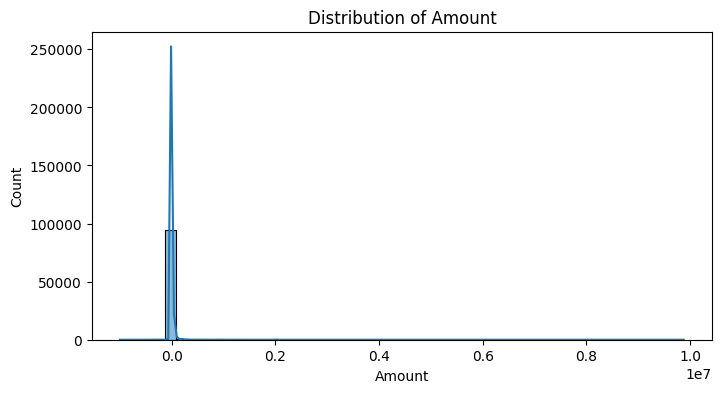

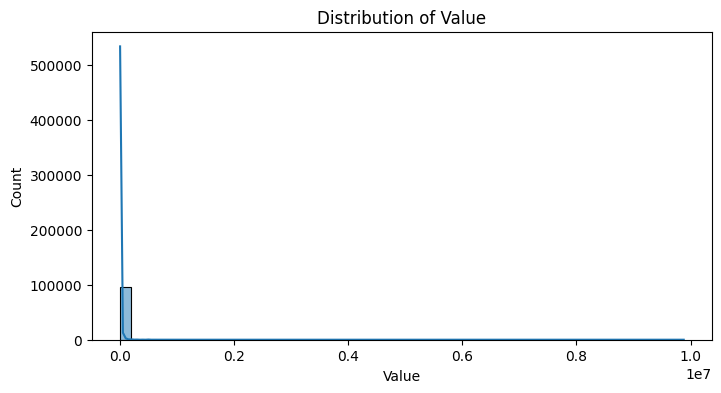

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Amount', 'Value']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [16]:
# Summary statistics for numeric features
df[['Amount', 'Value']].describe()


,Amount,Value
count,9.566200e+04,9.566200e+04
mean,6.717846e+03,9.900584e+03
std,1.233068e+05,1.231221e+05
min,-1.000000e+06,2.000000e+00
25%,-5.000000e+01,2.750000e+02
50%,1.000000e+03,1.000000e+03
75%,2.800000e+03,5.000000e+03
max,9.880000e+06,9.880000e+06


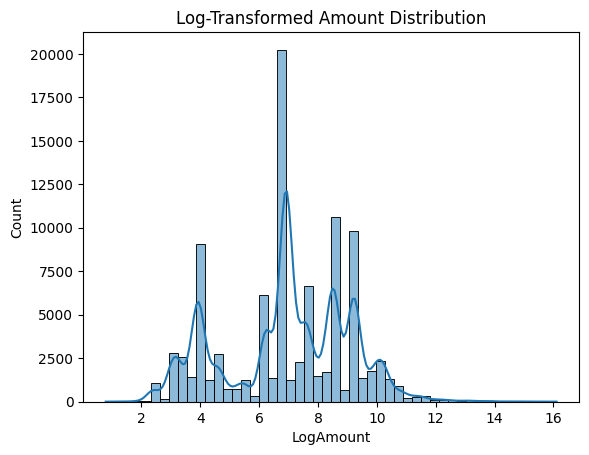

In [15]:
import numpy as np

df['LogAmount'] = df['Amount'].apply(lambda x: np.log1p(abs(x)))
sns.histplot(df['LogAmount'], bins=50, kde=True)
plt.title("Log-Transformed Amount Distribution")
plt.show()


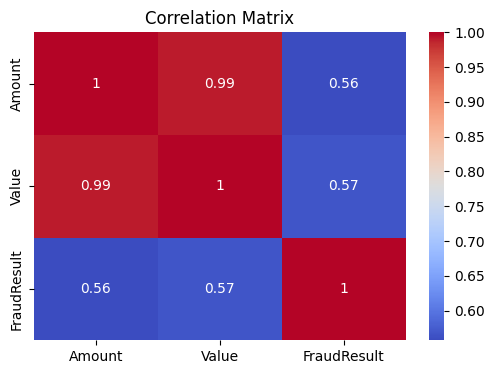

In [17]:
# Correlation matrix for numeric features
corr = df[['Amount', 'Value', 'FraudResult']].corr()

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [18]:
# Check for missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({'MissingValues': missing, 'Percent': missing_percent})
missing_df = missing_df[missing_df['MissingValues'] > 0].sort_values(by='Percent', ascending=False)

print("Missing values:")
display(missing_df)


Missing values:


,MissingValues,Percent


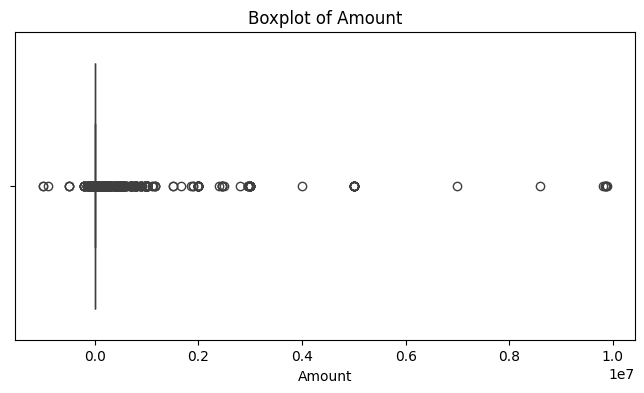

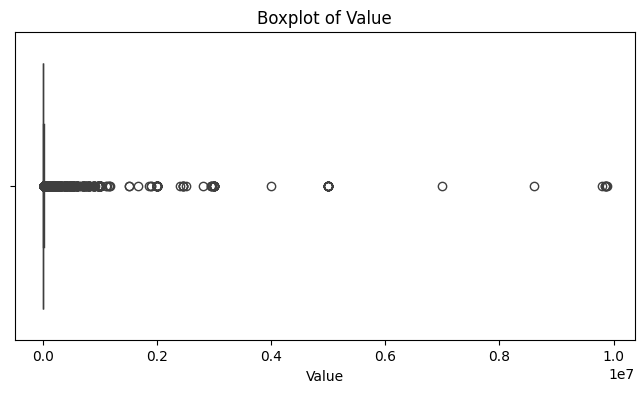

In [19]:
# Boxplot for Amount
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Amount")
plt.show()

# Boxplot for Value
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Value'])
plt.title("Boxplot of Value")
plt.show()


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


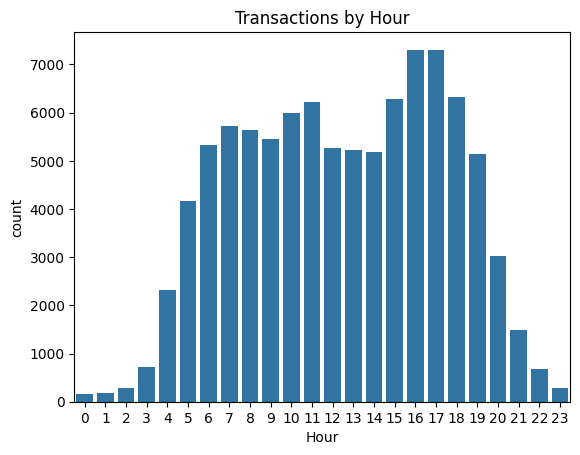

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


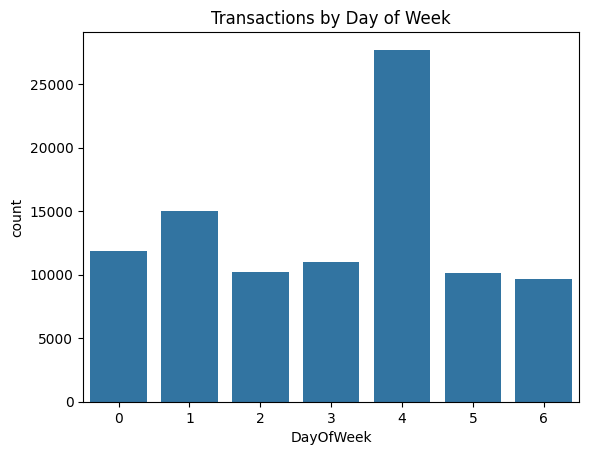

In [13]:
# Convert to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract features like hour of day, day of week
df['Hour'] = df['TransactionStartTime'].dt.hour
df['DayOfWeek'] = df['TransactionStartTime'].dt.dayofweek

# Plot
sns.countplot(x='Hour', data=df)
plt.title('Transactions by Hour')
plt.show()

sns.countplot(x='DayOfWeek', data=df)
plt.title('Transactions by Day of Week')
plt.show()


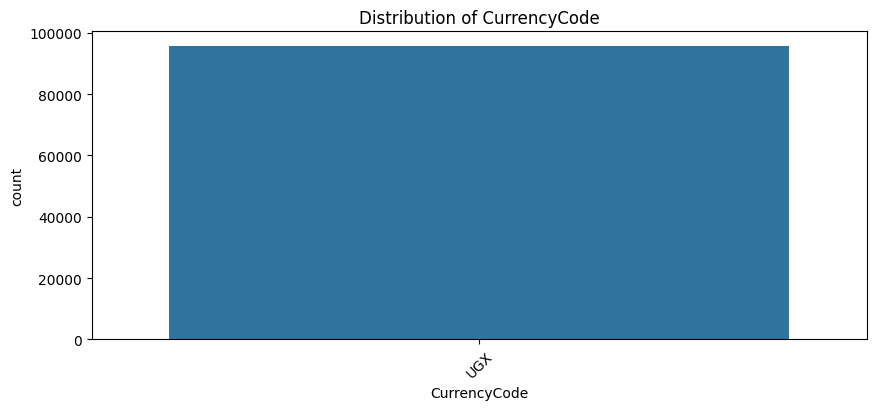

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


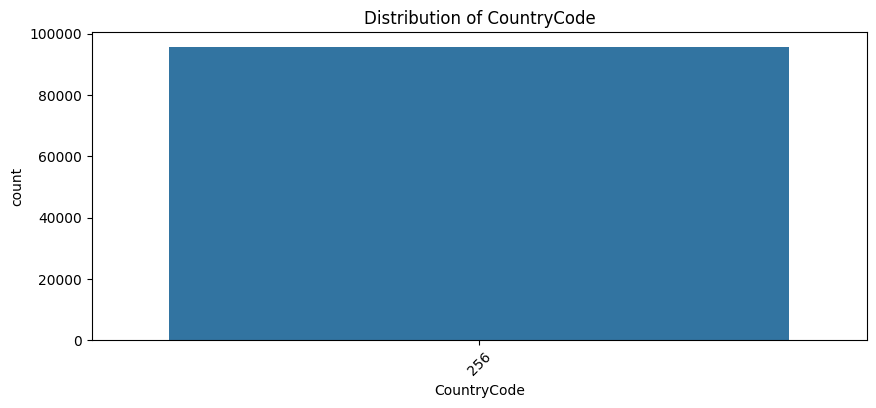

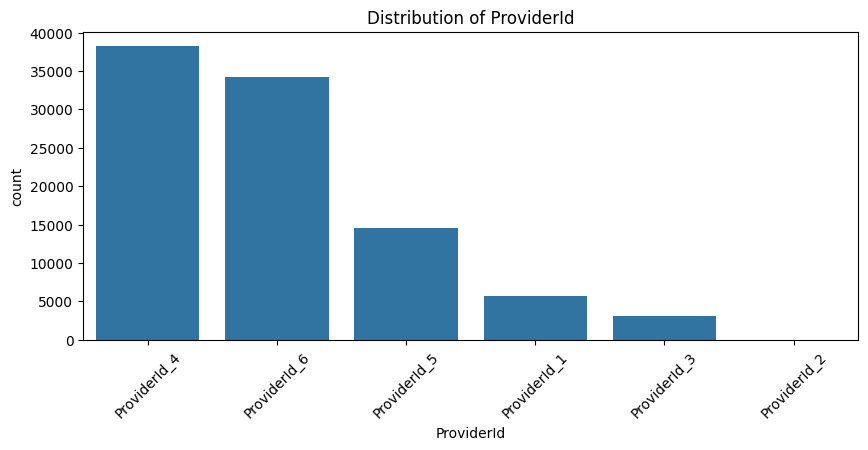

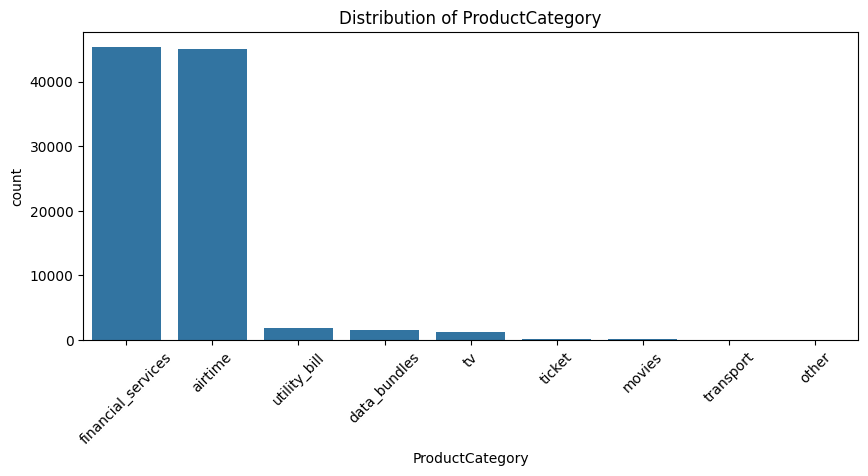

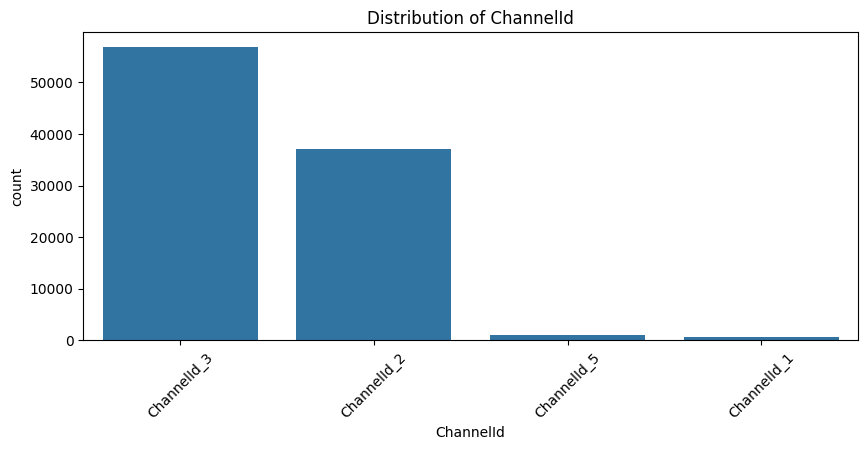

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


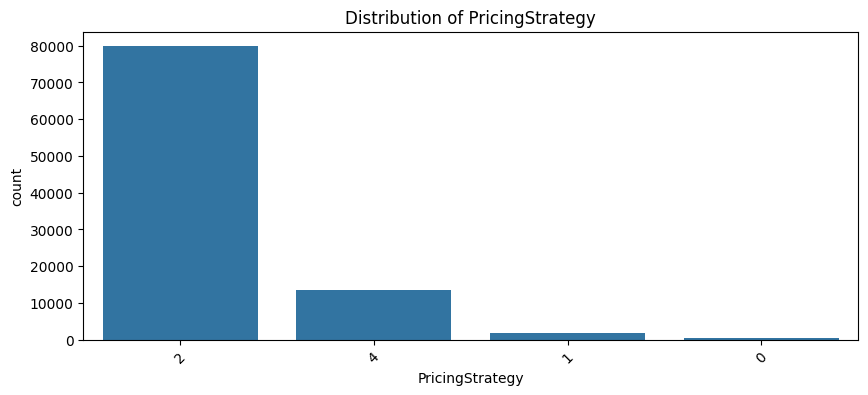

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


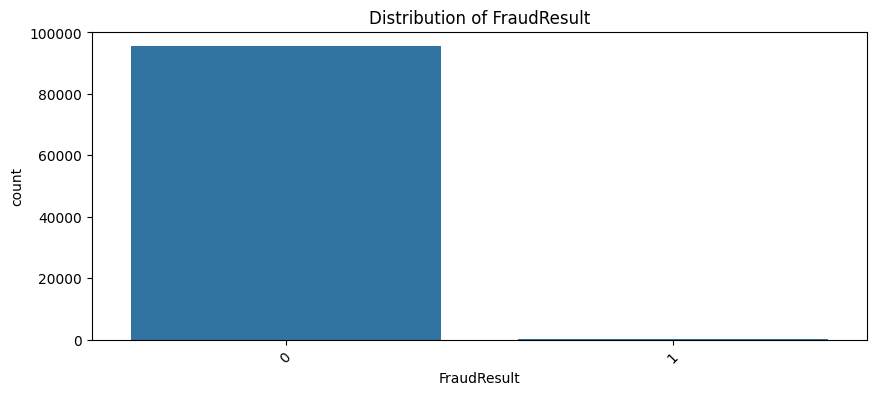

In [14]:
cat_features = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

for col in cat_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
